In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/HAR Dataset/HAR Mine")

In [3]:
!ls "/content/drive/My Drive/HAR Dataset/HAR Mine"

'Additional Testing Code'
'Basic Data'
 checkpoint
 converted_model.tflite
'data visualitaion.ipynb'
'Feature Test.ipynb'
 frozen_har.pb
'HAR get three activities.ipynb'
 history.p
 human_activity_recognition_basic.ipynb
 human_activity_recognition_Classifier.ipynb
'Human Activity Recognition Classifier Result.gsheet'
 Human_activity_recognition_feature_extract.ipynb
 Human_activity_recognition_magnitude_Feature_extract.ipynb
 human_activity_recognition_MINE_2.ipynb
 human_activity_recognition_MINE.ipynb
 human_activity_recognition_with_raw_data.ipynb
 human_activity_recognition_with_raw_data_new_tech.ipynb
 predictions.p
'Processed Data'
'RNN Result.gsheet'
'Subject with number activities performed.gsheet'
 wisdomDataRemoveJoggingActivity.ipynb


In [4]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

# Load Data

In [0]:
columns = ['x','y','z', 'timestamp_ms', 'subject_id', 'class', "timestamp_ms"]


#df = pd.read_csv('Basic Data/accelerometer_data_merged_all.csv')
#df = pd.read_csv('Basic Data/accelerometer_data_merged_three_activities.csv')

df = pd.read_csv('Basic Data/Three_activities_data.csv')
#df = pd.read_csv('Processed Data/Three_activities_data_with__50_window_size_without_overlapping.csv')
#df = pd.read_csv('Processed Data/Five_activities_data_with__50_window_size_without_overlapping.csv')


#df = pd.read_csv('WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df = df.dropna()

In [6]:
df.head()

,x,y,z,timestamp_ms,subject_id,class,timestamp_s
0,1.249481,12.565552,-0.324005,1.560000e+12,1,WALKING,1563706524
1,0.253494,14.217560,2.783661,1.560000e+12,1,WALKING,1563706524
2,0.504883,13.774628,2.587341,1.560000e+12,1,WALKING,1563706524
3,1.180054,12.532043,-0.027130,1.560000e+12,1,WALKING,1563706524
4,0.725159,12.230362,-0.292892,1.560000e+12,1,WALKING,1563706524


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212577 entries, 0 to 212576
Data columns (total 7 columns):
x               212577 non-null float64
y               212577 non-null float64
z               212577 non-null float64
timestamp_ms    212577 non-null float64
subject_id      212577 non-null int64
class           212577 non-null object
timestamp_s     212577 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 13.0+ MB


In [0]:
unisubs = np.unique(df['subject_id'])
#unisubs = np.unique(df['subject'])
#print(unisubs, type(unisubs))

In [10]:
np.unique(df['class'])

array(['SITTING', 'STANDING', 'WALKING'], dtype=object)

# Activity Bar Diagram


Text(0, 0.5, 'Number of data')

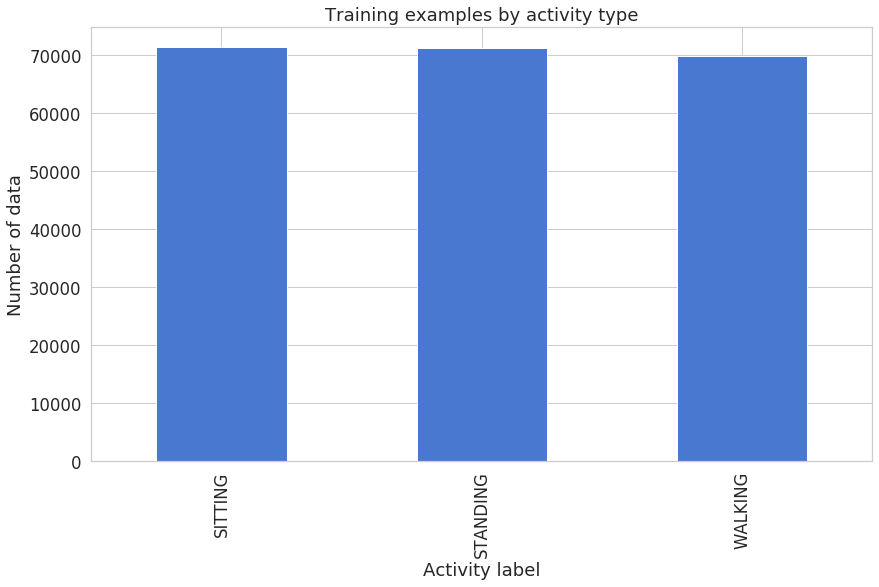

In [11]:
ax = df['class'].value_counts().plot(kind='bar', title='Training examples by activity type');
ax.set_xlabel("Activity label")
ax.set_ylabel("Number of data")

In [20]:
'''
ax = df['subject_id'].value_counts().plot(kind='bar', title='Training examples by user');
ax.set_xlabel("Subject ID")
ax.set_ylabel("Number of data")
#df['subject'].value_counts().plot(kind='bar', title='Training examples by user');

'''

'\nax = df[\'subject_id\'].value_counts().plot(kind=\'bar\', title=\'Training examples by user\');\nax.set_xlabel("Subject ID")\nax.set_ylabel("Number of data")\n#df[\'subject\'].value_counts().plot(kind=\'bar\', title=\'Training examples by user\');\n\n'

# One Subject's One Activity 

In [0]:
def plot_activity(subject, activity, df, activity_name):
  
  one_subject_segdata = df.loc[df['subject_id'] == subject]
  data = one_subject_segdata[one_subject_segdata['class'] == activity][['x', 'y','z']][:200]
  axis = data.plot(subplots=True, figsize=(18, 14), 
                   title= 'Subject: '+str(subject) + ' Activity: '+activity_name)
  for ax in axis:
      ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

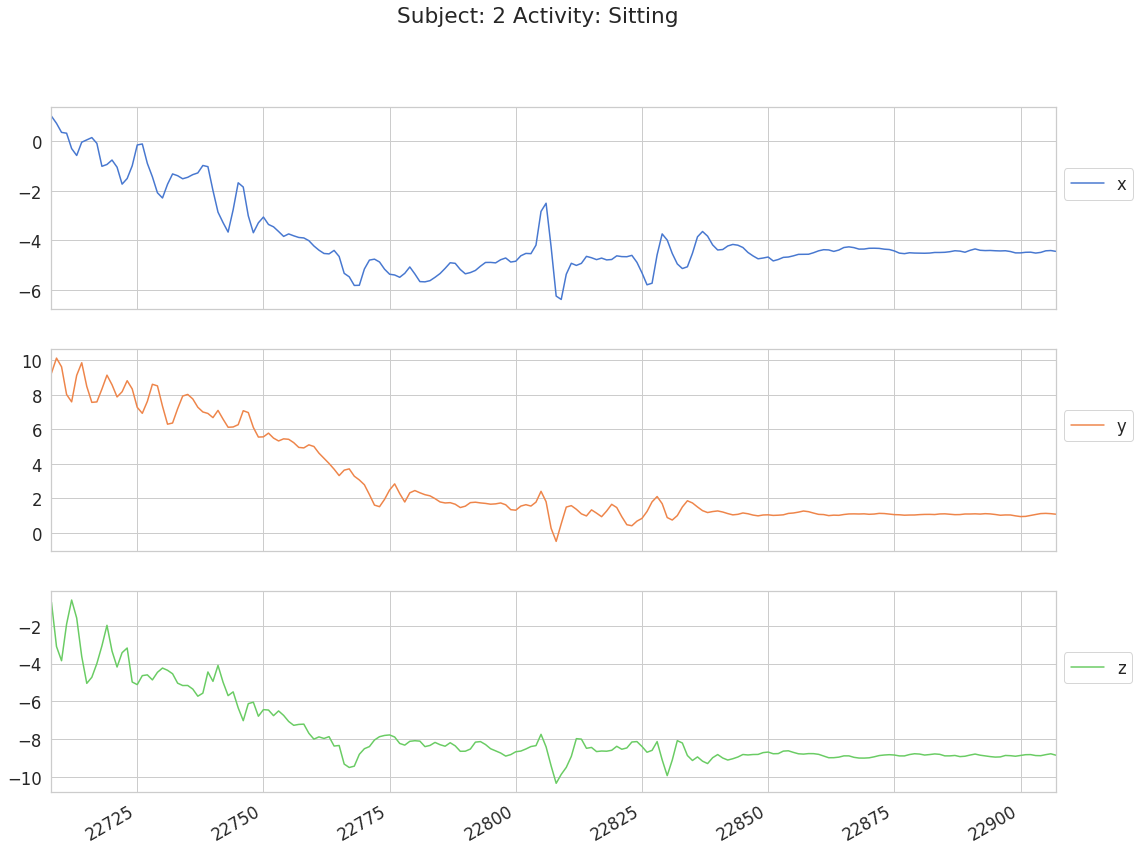

In [15]:
plot_activity(2,"SITTING", df, "Sitting")

# One Subject All Activity

In [0]:
def plot_one_subject_all_activity(subject, df):
  new_df = df.loc[df['subject_id'] == subject]
  #new_df = df.loc[df['subject'] == subject]
  new_df['class'].value_counts().plot(kind='bar', title=" Activity Performed BY "+'Subject '+ str(subject) );
  

In [0]:
unisubs = np.unique(df['subject_id'])
#unisubs = np.unique(df['subject'])
#print(unisubs, type(unisubs))

In [18]:
np.unique(df['class'])

array(['SITTING', 'STANDING', 'WALKING'], dtype=object)

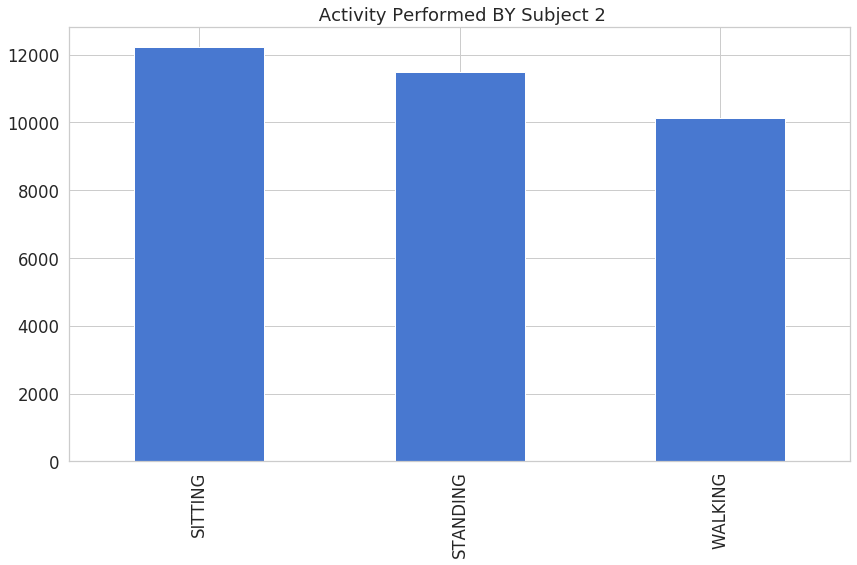

In [19]:
plot_one_subject_all_activity(2, df)